# 0.0 Business Context

**Desafio**

Criar um modelo de alta performance na identificação de clientes em churn.

Sobre a Empresa:
A TopBottonBank é um novo banco com atuação na europa.
 
**Entregável:**
Ao final da sua consultoria, você precisa entregar ao CEO da TopBottomBank um modelo em produção, que receberá uma base de clientes via API e desenvolverá essa base “scorada”, ou seja, um coluna à mais com a probabilidade de cada cliente entrar em churn.

Além disso, você precisará fornecer um relatório reportando a performance do seu modelo e o impacto financeiro da sua solução. Questões que o CEO e o time de Analytics gostariam de ver em seu relatório:

    - Qual a taxa atual de Churn da TopBank?
    - Qual a Performance do modelo em classificar os clientes como churns?
    - Qual o retorno esperado, em termos de faturamento, se a empresa utilizar seu modelo para evitar o churn dos clientes?

Uma possível ação para evitar que o cliente entre em churn é oferecer um cupom de desconto, ou alguma outro incentivo financeiro para ele renovar seu contrato por mais 12 meses.

 Para quais clientes você daria o incentivo financeiro e qual seria esse valor, de modo a maximizar o ROI (Retorno sobre o investimento). Lembrando que a soma dos incentivos não pode ultrapassar os  R$ 10.000.

**Index:**
 - 0.0 Problema de Negócio
 - 0.1 Importações de bibliotecas
 - 1.0 Coleta de Dados
 - 2.0 Descrição dos Dados
 - 3.0 Limpeza de dados
 - 4.0 Feature Engineering
 - 5.0 EDA
 - 6.0 Teste de Hipóteses
 - 7.0 Split de Dados
 - 8.0 Data Preparation
 - 9.0 Feature Selection
 - 10.0 Model Selection
 - 11.0 Tunning/Treinamento do modelo
 - 12.0 Interpretação dos Modelos
 - 13.0 API
 
**Estrátegia:**

1.0 Coleta de Dados:
Coletar os dados utilizando pd.read_csv().

2.0 Descrição dos Dados:
- Descrever as seguintes infos por feature: percentual de missing, valores únicos,     percentual de valores únicos, tipos de dados, skew, kurtosis.
- Descrever Gender vs Exited.
- Descrever Geography vs Exited.
- Descrever HasCrCard vs Exited 
- Descrever IsActiveMember vs Exited
- Descrever a variável 'type' com relação ao target.
- Descrever outras variáveis conforme for pertinente.
- Investigar a presença de Outliers.

3.0 Limpeza de dados:
- Eliminar os outliers utilizando a tecnica IQR.

4.0 Feature Engineering:
- Eliminar as variáveis RowNumber, CustomersId, Surname(granularidade alta) por apresentarem pouco ganho de informação para a modelagem do nosso problema.
- Criar variável com Kmeans usando k=2. O valor de k é devido a estarmos trabalhando com um problema binário.

Com objetivo de capturar concentrações que podem indicar o churn de clientes ou não foram criadas as variáveis abaixo:

    - Criar variável EstimatedSalary por location.
    - Criar variável Balance por location.
    - Criar variável EstimatedSalary por Gender.
    - Criar variável EstimatedSalary por HascrCard.
    - Criar variável CreditScore por HascrCard.
    - Criar variável CreditScore por Gender.
   
- Criar a variável LTV - Life Time Value, através da divisão de Balance por Tenure. Montante de dinheiro que o cliente (disponível para o banco realizar emprestimos) dividido pelo tempo que o cliente está com o Banco. 

5.0 EDA:
 - Realizar análise Univariada.
 - Realizar análise Multivariada.
 - Reealizar análise correlações utilizando Pearson para as variáveis numericas, cramer v para as variáveis categoricas e pointbiserial para correlacionar com o nosso Target.

6.0 Teste de Hipoteses:
 - H1 - O 'Balance' é maior acima de 30 anos de idade.
 - H2 - O 'Balance' é maior entre os clientes homens que mulheres.
 - H3 - O 'EstimatedSalary' é maior entre clientes homens que mulheres.
 - H4 - O 'EstimatedSalary' é maior acima de 30 anos de idade.
 - H5 - O churn é maior entre os menbros inativos que os ativos.

7.0 Split de Dados:
- Separar aleatoriamente 10% dos dados para dados de treino.

8.0 Data Preparation:
- Para a preparação dos dados iremos utilizar Ordinal Encoder.
- Sobre as variáveis numericas iremos testar duas trasnformações dirferentes  a RobustScaler e a PowerTransform.
- Iremos também balanciar os nosso dados utilizando uma tecnica hibrida entre over e under-sampling chamada SMOTETomeklink. A mesma consiste no under-sampling dos dados na fronteira das classes com o over-sampling dos dados mais afastados, o que gera uma maior separação entre as classes por essa razão a escolha por essa tecnica. 

9.0 Feature Selection:
 - A seleção de Features aplicaremos o algoritmo Boruta-Shap, que é um seletor do tipo wrapper que utilizara um modelo RandomForest() e shap values para selecionar as melhores variáveis.
 
10.0 Model Selection:
 - O modelo será selecionado conforme o recall, pois estamos trabalhando em problema binário cujo a classe positiva é um evento raro (churn) outra metrica que usaremos será a f1 que consiste na média harmonica entre o recall e a precision. A f1 nos indicara como esta o equilibrio do modelo em prever corretamente a tanto a classe positiva quanto a negativa.

11.0 Tunning/Treinamento do modelo:
- Será realiazado o tunning e o tranamento do ou dos modelos selecionados na etapa anterior.

12.0 Interpretação dos Modelos:
- Iremos interpretar os modelo utilizando matriz de confusão -com o objetivo de entender onde o modelo está errando-, learning_curves-para entendermos como está ocorrendo a convergência-, feature_importance -para entermos quais variaveis estão sendo mais relevantes na reslução do problema.

13.0 API:
- Servir o modelo através de uma API.


**Resultados - Report Final**

- **Qual a taxa atual de Churn da TopBank?**

  A taxa de Churn atual da empresa é de 20.37%
  
- **Qual a Performance do modelo em classificar os clientes como churns?**

  O Modelo escolhido foi o QDA(Quadratic Discriminant Analysis), o mesmo obteve um recall de 0.94, ou seja, nosso modelo irá identificar o cliente en churn com 94 por cento  de acuracia.
  
  
- **Qual o retorno esperado, em termos de faturamento, se a empresa utilizar seu modelo para evitar o churn dos clientes?**


- ROI:


# 0.1 Imports

In [1]:
# Geral
import pickle
import pandas as pd
import numpy as np
import requests
from MytoolBox import *

# Data Viz
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr
from scipy.stats import chi2_contingency
from scikitplot.metrics import plot_confusion_matrix, plot_roc


# Preprocessing
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import OrdinalEncoder, RobustScaler, PowerTransformer 
from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV

# Models
import lightgbm as lgb
from sklearn.svm import SVC
from BorutaShap import BorutaShap
from xgboost import XGBClassifier
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

# Hipo Test
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import ttest_ind

# Evaluation
from sklearn.metrics import classification_report, accuracy_score, cohen_kappa_score, precision_score, f1_score, recall_score

## Helper Functions

In [2]:
def Myheat_map(dataset, variaveis):
    
    """
    
    
    """

    df_corr = dataset[variaveis].corr()

    fig, ax = plt.subplots(figsize=(16, 10))
    # mask
    mask = np.triu(np.ones_like(df_corr, dtype=np.bool))
    # adjust mask and df
    mask = mask[1:, :-1]
    corr = df_corr.iloc[1:,:-1].copy()
    # color map
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

    # plot heatmap
    sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
                   linewidths=5, cmap=cmap, vmin=-1, vmax=1, 
                   cbar_kws={"shrink": .8}, square=True)
    yticks = [i.upper() for i in corr.index]
    xticks = [i.upper() for i in corr.columns]
    plt.yticks(plt.yticks()[0], labels=yticks, rotation=0)
    plt.xticks(plt.xticks()[0], labels=xticks, rotation=20)

    # title
    title = 'CORRELATION MATRIX\n'
    plt.title(title, loc='left', fontsize=18)
    plt.show()
    
def cramer_v(var_x, var_y):
    """
    Function to calculate the Cramers v correlation.

    """
    # builds contigency matrix (or confusion matrix)
    confusion_matrix_v = pd.crosstab(var_x, var_y).values

    # gets the sum of all values in the matrix
    n = confusion_matrix_v.sum()

    # gets the rows, cols
    r, k = confusion_matrix_v.shape

    # gets the chi-squared
    chi2 = chi2_contingency(confusion_matrix_v)[0]

    # makes the bias correction
    chi2corr = max(0, chi2 - (k-1) * (r-1) / (n-1))
    kcorr = k - (k-1) ** 2 / (n-1)
    rcorr = r - (r-1) ** 2 / (n-1)

    # returns cramér V
    return np.sqrt((chi2corr/n) / min(kcorr-1, rcorr-1))

def model_selection(Xtrain, ytrain, Xtest, ytest):
    """
    
    """
    
    # Modelos
    models = [('lr',LogisticRegression(),1),
              ('svm',SVC(),2),
              ('lda',LinearDiscriminantAnalysis(),3),
              ('qda',QuadraticDiscriminantAnalysis(),4),
              ('dt',DecisionTreeClassifier(),5),
              ('rf', RandomForestClassifier(class_weight="balanced"),6),
              ('lgb',lgb.LGBMClassifier(),7),
              ('xgboost', XGBClassifier(),8)]

    # Resultados
    resultados = {'LR': [],
                  'SVM': [],
                  'LDA': [],
                  'QDA': [],
                  'DecisionTree': [],
                  'RandomForestClassifier': [],
                  'LGBM': [],
                  'XGBOOST': []}

    # Testando algoritmos
    for name, model,_ in models:
        
        counter = 0
        resultado = []
        while counter <= 10:
        
            # resultado
            model.fit(Xtrain, ytrain)
            pred = model.predict(Xtest)
            score = recall_score(ytest, pred)
            resultado.append(score)
            counter += 1


        if name == 'lr':
            resultados['LR'].append(np.mean(resultado))
        elif name == 'knn':
            resultados['KNN'].append(np.mean(resultado)) 
        elif name == 'svm':
            resultados['SVM'].append(np.mean(resultado))
        elif name == 'dt':
            resultados['DecisionTree'].append(np.mean(resultado))
        elif name == 'rf':
            resultados['RandomForestClassifier'].append(np.mean(resultado))
        elif name == 'lgb':
            resultados['LGBM'].append(np.mean(resultado))
        elif name == 'xgboost':
            resultados['XGBOOST'].append(np.mean(resultado))
        elif name =='lda':
            resultados['LDA'].append(np.mean(resultado))
        elif name == 'qda':
            resultados['QDA'].append(np.mean(resultado))
            

    # Painel
    resultados_df = pd.DataFrame(resultados)
    return resultados_df

# 1.0 Data Colection

In [3]:
churn = pd.read_csv('data/churn.csv')
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# 2.0 Data Description

**Book de Variáveis:**

Age: Idade do cliente.

Balance: Quantidade de dinheiro na

CreditScore: Score de crédito do cliente.

CustomerId: Identificador unico do cliente.

EstimatedSalary: Salário estimado do cliente.

Exited: Variável target se ocorreu ou não churn do cliente.

Gender: Genêro do cliente.

Geography: Localizaçao do cliente.

HasCrCard: Flag se o cliente possui um cartão de crédito ou não

IsActiveMember: Flag se o cliente é ativo ou não.

RowNumber: Número da linha no dataset.

Surname: Sobrenome do cliente.

Ternure: Quantidade em anos que o cliente ainda está no banco ( no-churn ) e ela também diz quanto tempo o cliente ficou no banco até o churn.

In [4]:
# Describe
pd.DataFrame({'missing' :churn.isna().mean(),
              'uniques' :churn.nunique(),
              'dtypes'  :churn.dtypes,
              'min'     :churn.min(),
              'mean'    :churn.mean(),
              'median'  :churn.median(),
              'max'     :churn.max(),
              'skew'    :churn.skew(),
              'kurtosis':churn.kurtosis()})

,missing,uniques,dtypes,min,mean,median,max,skew,kurtosis
Age,0.0,70,int64,18,3.892180e+01,3.700000e+01,92,1.011320,1.395347
Balance,0.0,6382,float64,0,7.648589e+04,9.719854e+04,250898,-0.141109,-1.489412
CreditScore,0.0,460,int64,350,6.505288e+02,6.520000e+02,850,-0.071607,-0.425726
CustomerId,0.0,10000,int64,15565701,1.569094e+07,1.569074e+07,15815690,0.001149,-1.196113
EstimatedSalary,0.0,9999,float64,11.58,1.000902e+05,1.001939e+05,199992,0.002085,-1.181518
Exited,0.0,2,int64,0,2.037000e-01,0.000000e+00,1,1.471611,0.165671
Gender,0.0,2,object,Female,NaN,NaN,Male,NaN,NaN
Geography,0.0,3,object,France,NaN,NaN,Spain,NaN,NaN
HasCrCard,0.0,2,int64,0,7.055000e-01,1.000000e+00,1,-0.901812,-1.186973
IsActiveMember,0.0,2,int64,0,5.151000e-01,1.000000e+00,1,-0.060437,-1.996747


 - Temos dados de diferentes escalas
 - 'Customerid' e 'RowNumber' é um idientificador único podemos eliminar ou utiliza-lo como index do dataframe.
 - As variáveis 'HasCrCard' 'IsActiveMember' são categoricas ordinais iremos alterar o seu tipo para category.

## Target - Exited

Exited
0    79.63
1    20.37
Name: RowNumber, dtype: float64

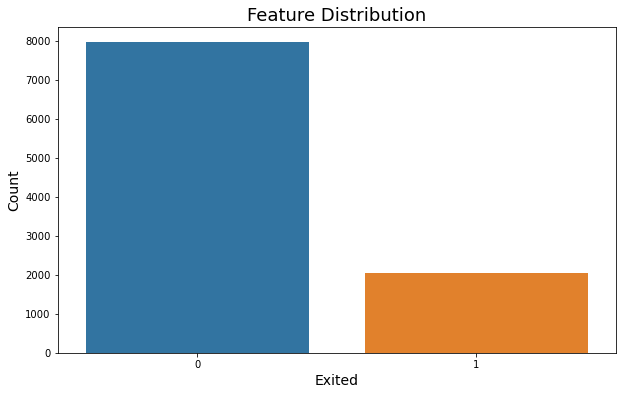

In [5]:
# Checkando o balanciamento da variável Target
ax = sns.countplot(x='Exited', hue=None, data=churn)
ax.figure.set_size_inches(10, 6)
ax.set_title('Feature Distribution', fontsize=18, loc='center')
ax.set_xlabel('Exited', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax=ax

# Percentual de observações por valores Geography
churn.groupby('Exited').count()['RowNumber'].apply(lambda x: (x/churn.shape[0])*100)

- Podemos observar que as classes da variável Target esta desbalanciada.

## Descrever Gender vs Exited

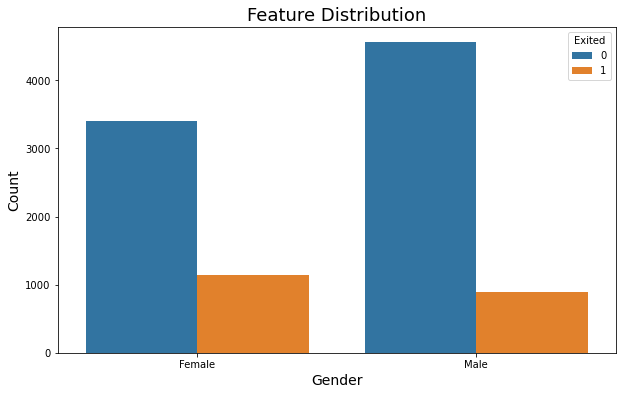

In [6]:
ax = sns.countplot(x='Gender', hue='Exited', data=churn)
ax.figure.set_size_inches(10, 6)
ax.set_title('Feature Distribution', fontsize=18, loc='center')
ax.set_xlabel('Gender', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax=ax

 - Aparentemente não existe uma concentração do evento de 'Churn' conforme o genero.

## Descrever Geography vs Exited

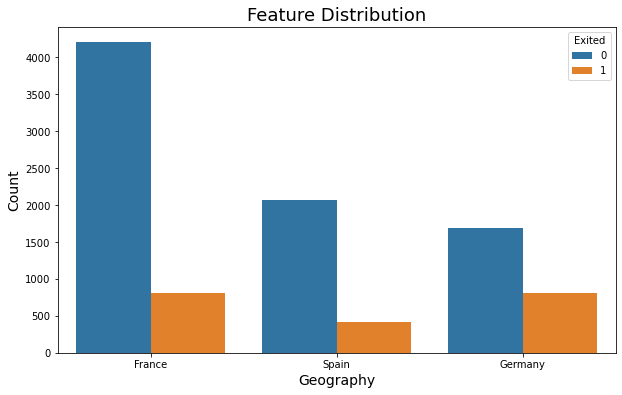

In [7]:
ax = sns.countplot(x='Geography', hue='Exited', data=churn)
ax.figure.set_size_inches(10, 6)
ax.set_title('Feature Distribution', fontsize=18, loc='center')
ax.set_xlabel('Geography', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax=ax

In [8]:
# Percentual de observações por valores Geography
churn.groupby('Geography').count()['RowNumber'].apply(lambda x: (x/churn.shape[0])*100)

Geography
France     50.14
Germany    25.09
Spain      24.77
Name: RowNumber, dtype: float64

- Notamos que proporcionalmente parece ocorrer um maior churn de clientes da Alemanha. A mesma possui comente 25% das observações porém possui mais eventos churn que as demais categorias.

## Descrever HasCrCard vs Exited

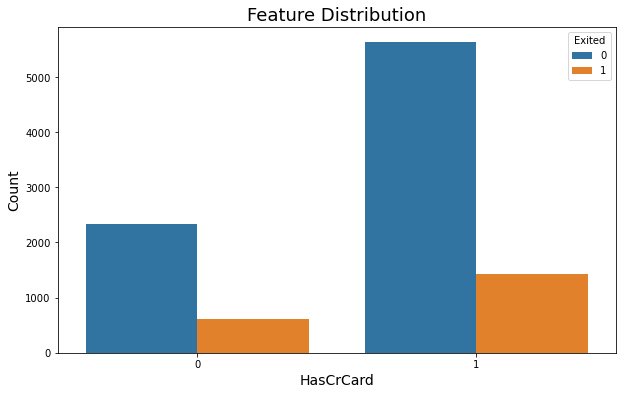

In [9]:
ax = sns.countplot(x='HasCrCard', hue='Exited', data=churn)
ax.figure.set_size_inches(10, 6)
ax.set_title('Feature Distribution', fontsize=18, loc='center')
ax.set_xlabel('HasCrCard', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax=ax

In [10]:
# Percentual de observações por valores HasCrCard
churn.groupby('HasCrCard').count()['RowNumber'].apply(lambda x: (x/churn.shape[0])*100)

HasCrCard
0    29.45
1    70.55
Name: RowNumber, dtype: float64

- Devido a maior concentração de obseravções com cartão de credito temos também maior numero de eventos de churn.

## Descrever IsActiveMember vs Exited

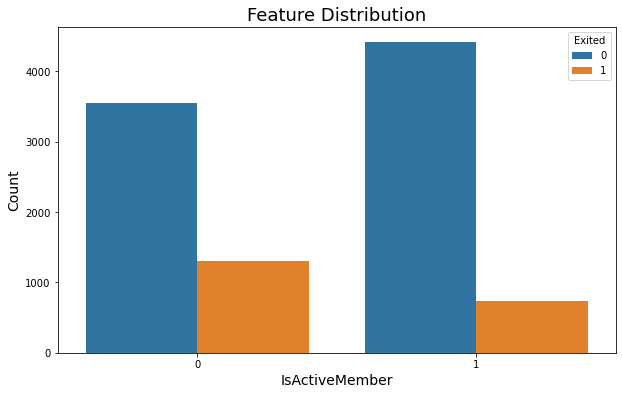

In [11]:
ax = sns.countplot(x='IsActiveMember', hue='Exited', data=churn)
ax.figure.set_size_inches(10, 6)
ax.set_title('Feature Distribution', fontsize=18, loc='center')
ax.set_xlabel('IsActiveMember', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
ax=ax

In [12]:
# Percentual de observações por valores HasCrCard
churn.groupby('IsActiveMember').count()['RowNumber'].apply(lambda x: (x/churn.shape[0])*100)

IsActiveMember
0    48.49
1    51.51
Name: RowNumber, dtype: float64

 - Em um primeiro momento notamos que a inatividade leva a um maior churn. Os eventos estão distribuídos porém com maior quantidade de eventos de churn na categoria de inatividade.

## Alterando os tipos das variáveis 'HasCrCard', 'IsActiveMember', Exited

In [13]:
# Alterando o tipo de dados para category
colunas = ['HasCrCard','IsActiveMember', 'Exited', 'Surname', 'Geography','Gender']

for col in colunas:
    churn[col] = churn[col].astype('category')

In [14]:
# checkando os tipos
churn.dtypes

RowNumber             int64
CustomerId            int64
Surname            category
CreditScore           int64
Geography          category
Gender             category
Age                   int64
Tenure                int64
Balance             float64
NumOfProducts         int64
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited             category
dtype: object

## Checkando a Presença de Outliers

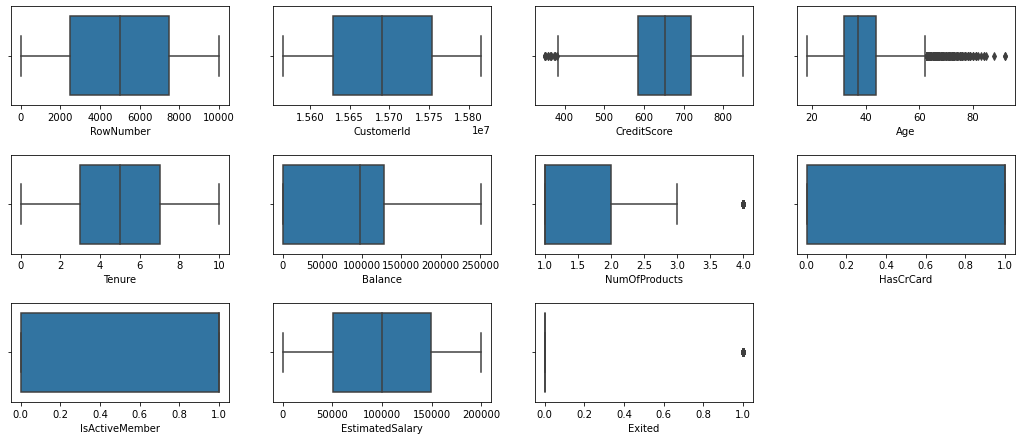

In [5]:
# Variáveis
variables = churn.select_dtypes(['int64', 'float64']).columns.to_list()

# Setando a posicão inicial
n = 1

plt.figure(figsize=(18, 10))
for column in churn[variables].columns:
    plt.subplot(4, 4, n)
    _ = sns.boxplot(x=column, data=churn)
    n += 1

plt.subplots_adjust(hspace=0.5)
plt.show()

 - Observamos Outliers nas variáveis 'CreditScore', 'Age','NumOfProducts'

### CreditScore

In [16]:
# Calculando o Q1 e Q3 e IQR
Q1 = np.quantile(churn['CreditScore'], .25)
Q3 = np.quantile(churn['CreditScore'], .75)
IQR = Q3 - Q1

# Calculando os limites low and high
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

# priting the limits
print(f'O limite inferior é {low}')
print(f'O limite superior é {high}')

O limite inferior é 383.0
O limite superior é 919.0


 - Filtrando somente o limite inferior, pois no boxplot observamos outliers somente no limite inferior.

### Age

In [17]:
# Calculando o Q1 e Q3 e IQR
Q1 = np.quantile(churn['Age'], .25)
Q3 = np.quantile(churn['Age'], .75)
IQR = Q3 - Q1

# Calculando os limites low and high
low = Q1 - 1.5 * IQR
high = Q3 + 1.5 * IQR

# priting the limits
print(f'O limite inferior é {low}')
print(f'O limite superior é {high}')

O limite inferior é 14.0
O limite superior é 62.0


 - Filtrando somente o limite superior, pois no boxplot observamos outliers somente no limite superior.

### NumOfProducts

Iremos filtrar todas as observações com 4 produtos, pois conforme o boxplot os outliers estão nesse patamar.

# 3.0 Limpeza de Dados

 ## 3.1 Cleaning Outliers.

In [6]:
# Filtrando 'CreditScore' somente o limite inferior.
churn = churn.loc[churn['CreditScore']>400, ]

# Filtrando 'Age' somente o limite inferior
churn = churn.loc[churn['Age']<59, ]

# Filtrando 'NumOfProducts'
churn = churn.loc[churn['NumOfProducts']<4, ]

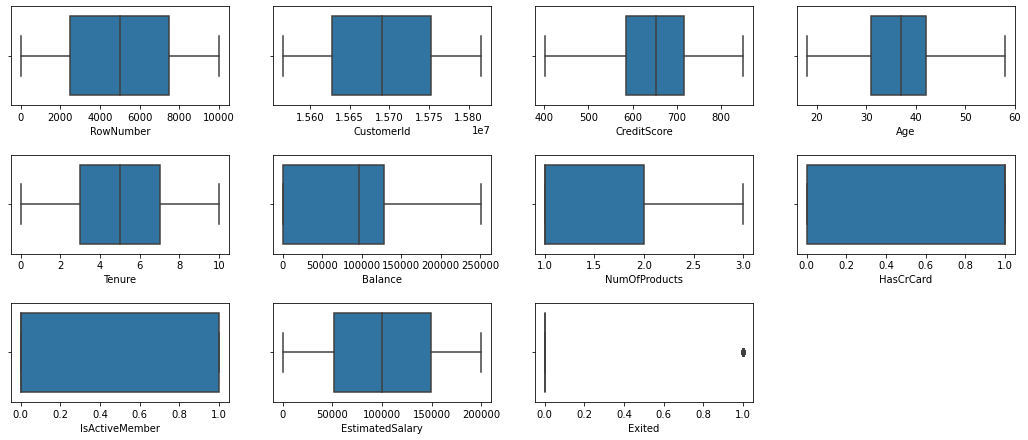

In [7]:
# checking the outliers again.
# Variáveis
variables = churn.select_dtypes(['int64', 'float64']).columns.to_list()

# Setando a posicão inicial
n = 1

plt.figure(figsize=(18, 10))
for column in churn[variables].columns:
    plt.subplot(4, 4, n)
    _ = sns.boxplot(x=column, data=churn)
    n += 1

plt.subplots_adjust(hspace=0.5)
plt.show()

# 4.0 Feature Engineering

- Eliminar as variáveis RowNumber, CustomersId, Surname(granularidade alta) por apresentarem pouco ganho de informação para a modelagem do nosso problema.
- Criar variável com Kmeans usando k=2. O valor de k é devido a estarmos trabalhando com um problema binário.

Com objetivo de capturar concentrações que podem indicar o churn de clientes ou não foram criadas as variáveis abaixo:

    - Criar variável EstimatedSalary por location.
    
    - Criar variável Balance por location.
    
    - Criar variável EstimatedSalary por Gender.
    
    - Criar variável EstimatedSalary por HascrCard.
    
    - Criar variável CreditScore por HascrCard.
    
    - Criar variável CreditScore por Gender.
    
  
- Criar a variável LTV - Life Time Value, através da divisão de Balance por Tenure. Montante de dinheiro que o cliente (disponível para o banco realizar emprestimos) dividido pelo tempo que o cliente está com o Banco. 

In [8]:
# Copia do dataset original
dataset = churn.copy()

In [9]:
# Eliminando RowNumber, CustomersId, Surname(granularidade alta)
dataset.drop(['RowNumber','CustomerId','Surname'], inplace=True, axis=1)

In [10]:
# Variável kmeans distancia eucliadiana
# Criando copia
churn_temp = dataset.copy()

# Encoder
enc = OrdinalEncoder()
churn_temp['Gender'] = churn_temp['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
churn_temp['Geography'] = enc.fit_transform(np.array(churn_temp['Geography']).reshape(-1,1))

# kmeans model
model = KMeans(n_clusters=2,init='k-means++')
model.fit(churn_temp)
dataset['kmeans_group'] = model.labels_
dataset['kmeans_group'] = dataset['kmeans_group'].astype('category')
dataset['kmeans_group'] = dataset['kmeans_group'].apply(lambda x: 'G1' if x==1 else 'G2')

In [11]:
# Criar variável Balance por location
group_balance = dataset.groupby('Geography').agg({'Balance': ['mean']}).reset_index()
group = pd.concat([group_balance['Geography'],group_balance['Balance']['mean']], axis=1)
group = group.rename(columns={"mean":"balance_mean_geo"})
dataset = dataset.merge(group, left_on='Geography', right_on='Geography', how='inner')

In [12]:
# Criar variável EstimatedSalary por location
group_EstimatedSalary = dataset.groupby('Geography').agg({'EstimatedSalary': ['mean']}).reset_index()
group = pd.concat([group_EstimatedSalary['Geography'],  group_EstimatedSalary['EstimatedSalary']['mean']], axis=1)
group = group.rename(columns={"mean":"EstimatedSalary_mean_geo"})
dataset = dataset.merge(group, left_on='Geography', right_on='Geography', how='inner')

In [13]:
# Criar variável EstimatedSalary por gender
group_Gender = dataset.groupby('Gender').agg({'EstimatedSalary': ['mean']}).reset_index()
group = pd.concat([group_Gender['Gender'],  group_Gender['EstimatedSalary']['mean']], axis=1)
group = group.rename(columns={"mean":"EstimatedSalary_mean_gender"})
dataset = dataset.merge(group, left_on='Gender', right_on='Gender', how='inner')

In [14]:
# Criar variável EstimatedSalary por hascrcard
group_HasCrCard = dataset.groupby('HasCrCard').agg({'EstimatedSalary': ['mean']}).reset_index()
group = pd.concat([group_HasCrCard['HasCrCard'],  group_HasCrCard['EstimatedSalary']['mean']], axis=1)
group = group.rename(columns={"mean":"group_HasCrCard_mean"})
dataset = dataset.merge(group, left_on='HasCrCard', right_on='HasCrCard', how='inner')

In [15]:
# Criar variável CreditScore score por Hascrcard
group_hascrcard = dataset.groupby('HasCrCard').agg({'CreditScore': ['mean']}).reset_index()
group = pd.concat([group_hascrcard['HasCrCard'],  group_hascrcard['CreditScore']['mean']], axis=1)
group = group.rename(columns={"mean":"hascrcard_mean_credit"})
dataset = dataset.merge(group, left_on='HasCrCard', right_on='HasCrCard', how='inner')

In [16]:
# Criar variável CreditScore score por Gender
group_gender = dataset.groupby('Gender').agg({'CreditScore': ['mean']}).reset_index()
group = pd.concat([group_gender['Gender'],  group_gender['CreditScore']['mean']], axis=1)
group = group.rename(columns={"mean":"gender_mean_credit"})
dataset = dataset.merge(group, left_on='Gender', right_on='Gender', how='inner')

In [17]:
# Criar variável LTV
balance = dataset['Balance'].astype('int64')
dataset['LTV'] = balance / (dataset['Tenure'] + 0.1)

In [18]:
# Arrumando alguns tipos de dados
dataset['IsActiveMember'] = dataset['IsActiveMember'].astype('category') 

In [19]:
# Dando uma olhada como ficou o dataset
dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,kmeans_group,balance_mean_geo,EstimatedSalary_mean_geo,EstimatedSalary_mean_gender,group_HasCrCard_mean,hascrcard_mean_credit,gender_mean_credit,LTV
0,619,France,Female,42,2,0.0,1,1,1,101348.88,1,G2,62155.348676,100060.32564,100589.201277,99601.810744,650.679423,651.271631,0.000000
1,502,France,Female,42,8,159660.8,3,1,0,113931.57,1,G1,62155.348676,100060.32564,100589.201277,99601.810744,650.679423,651.271631,19711.111111
2,476,France,Female,34,10,0.0,2,1,0,26260.98,0,G2,62155.348676,100060.32564,100589.201277,99601.810744,650.679423,651.271631,0.000000
3,726,France,Female,24,6,0.0,2,1,1,54724.03,0,G2,62155.348676,100060.32564,100589.201277,99601.810744,650.679423,651.271631,0.000000
4,846,France,Female,38,5,0.0,1,1,1,187616.16,0,G2,62155.348676,100060.32564,100589.201277,99601.810744,650.679423,651.271631,0.000000


# 5.0 EDA

## 5.1 Análise Univariada

### Variáveis Categóricas

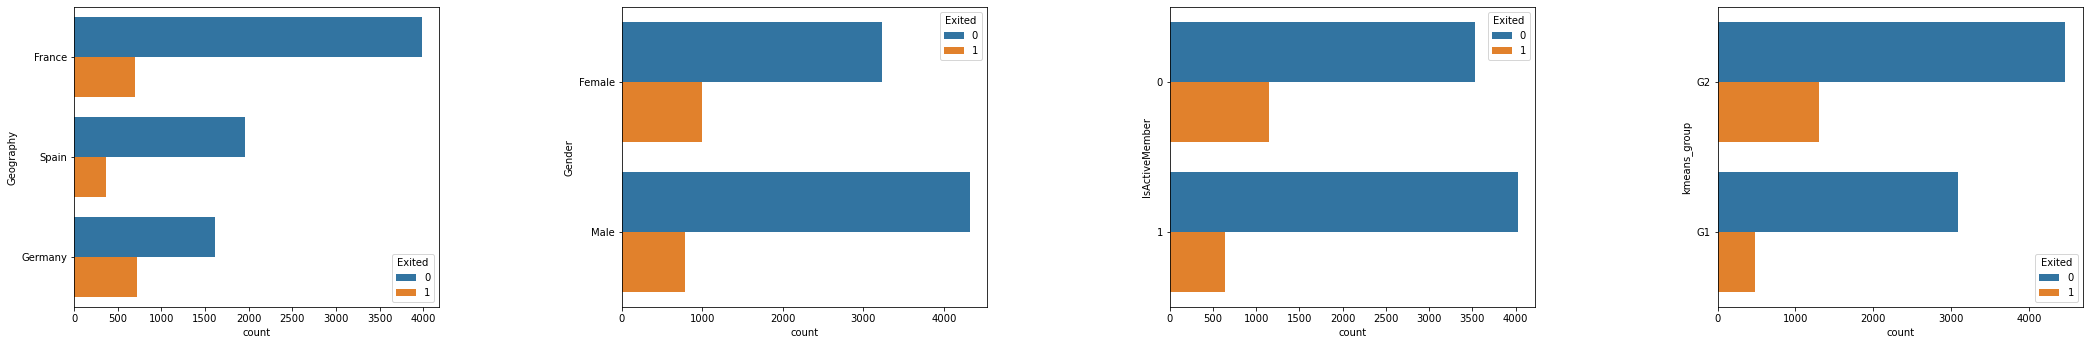

In [20]:
# checking the outliers again.
# Variáveis
variables = dataset.select_dtypes(['category', 'object']).columns.to_list()

# Setando a posicão inicial
n = 1

plt.figure(figsize=(36, 32))
for column in dataset[variables].columns:
    plt.subplot(4, 4, n)
    _ = sns.countplot(y=column,hue='Exited', data=dataset)
    n += 1

plt.subplots_adjust(hspace=0.6,wspace=0.5)
plt.show()

- Os casos de churn paracem estar concentrados na localidade 'Germany' uma vez que o total de observações é bem menor que os da France porém com a mesma quantidade de exemplos de Churn.

- Nas demais variáveis parece que a maior concetração de churn é também devida a uma maior concetração de observações em geral.


### Variáveis Númericas.

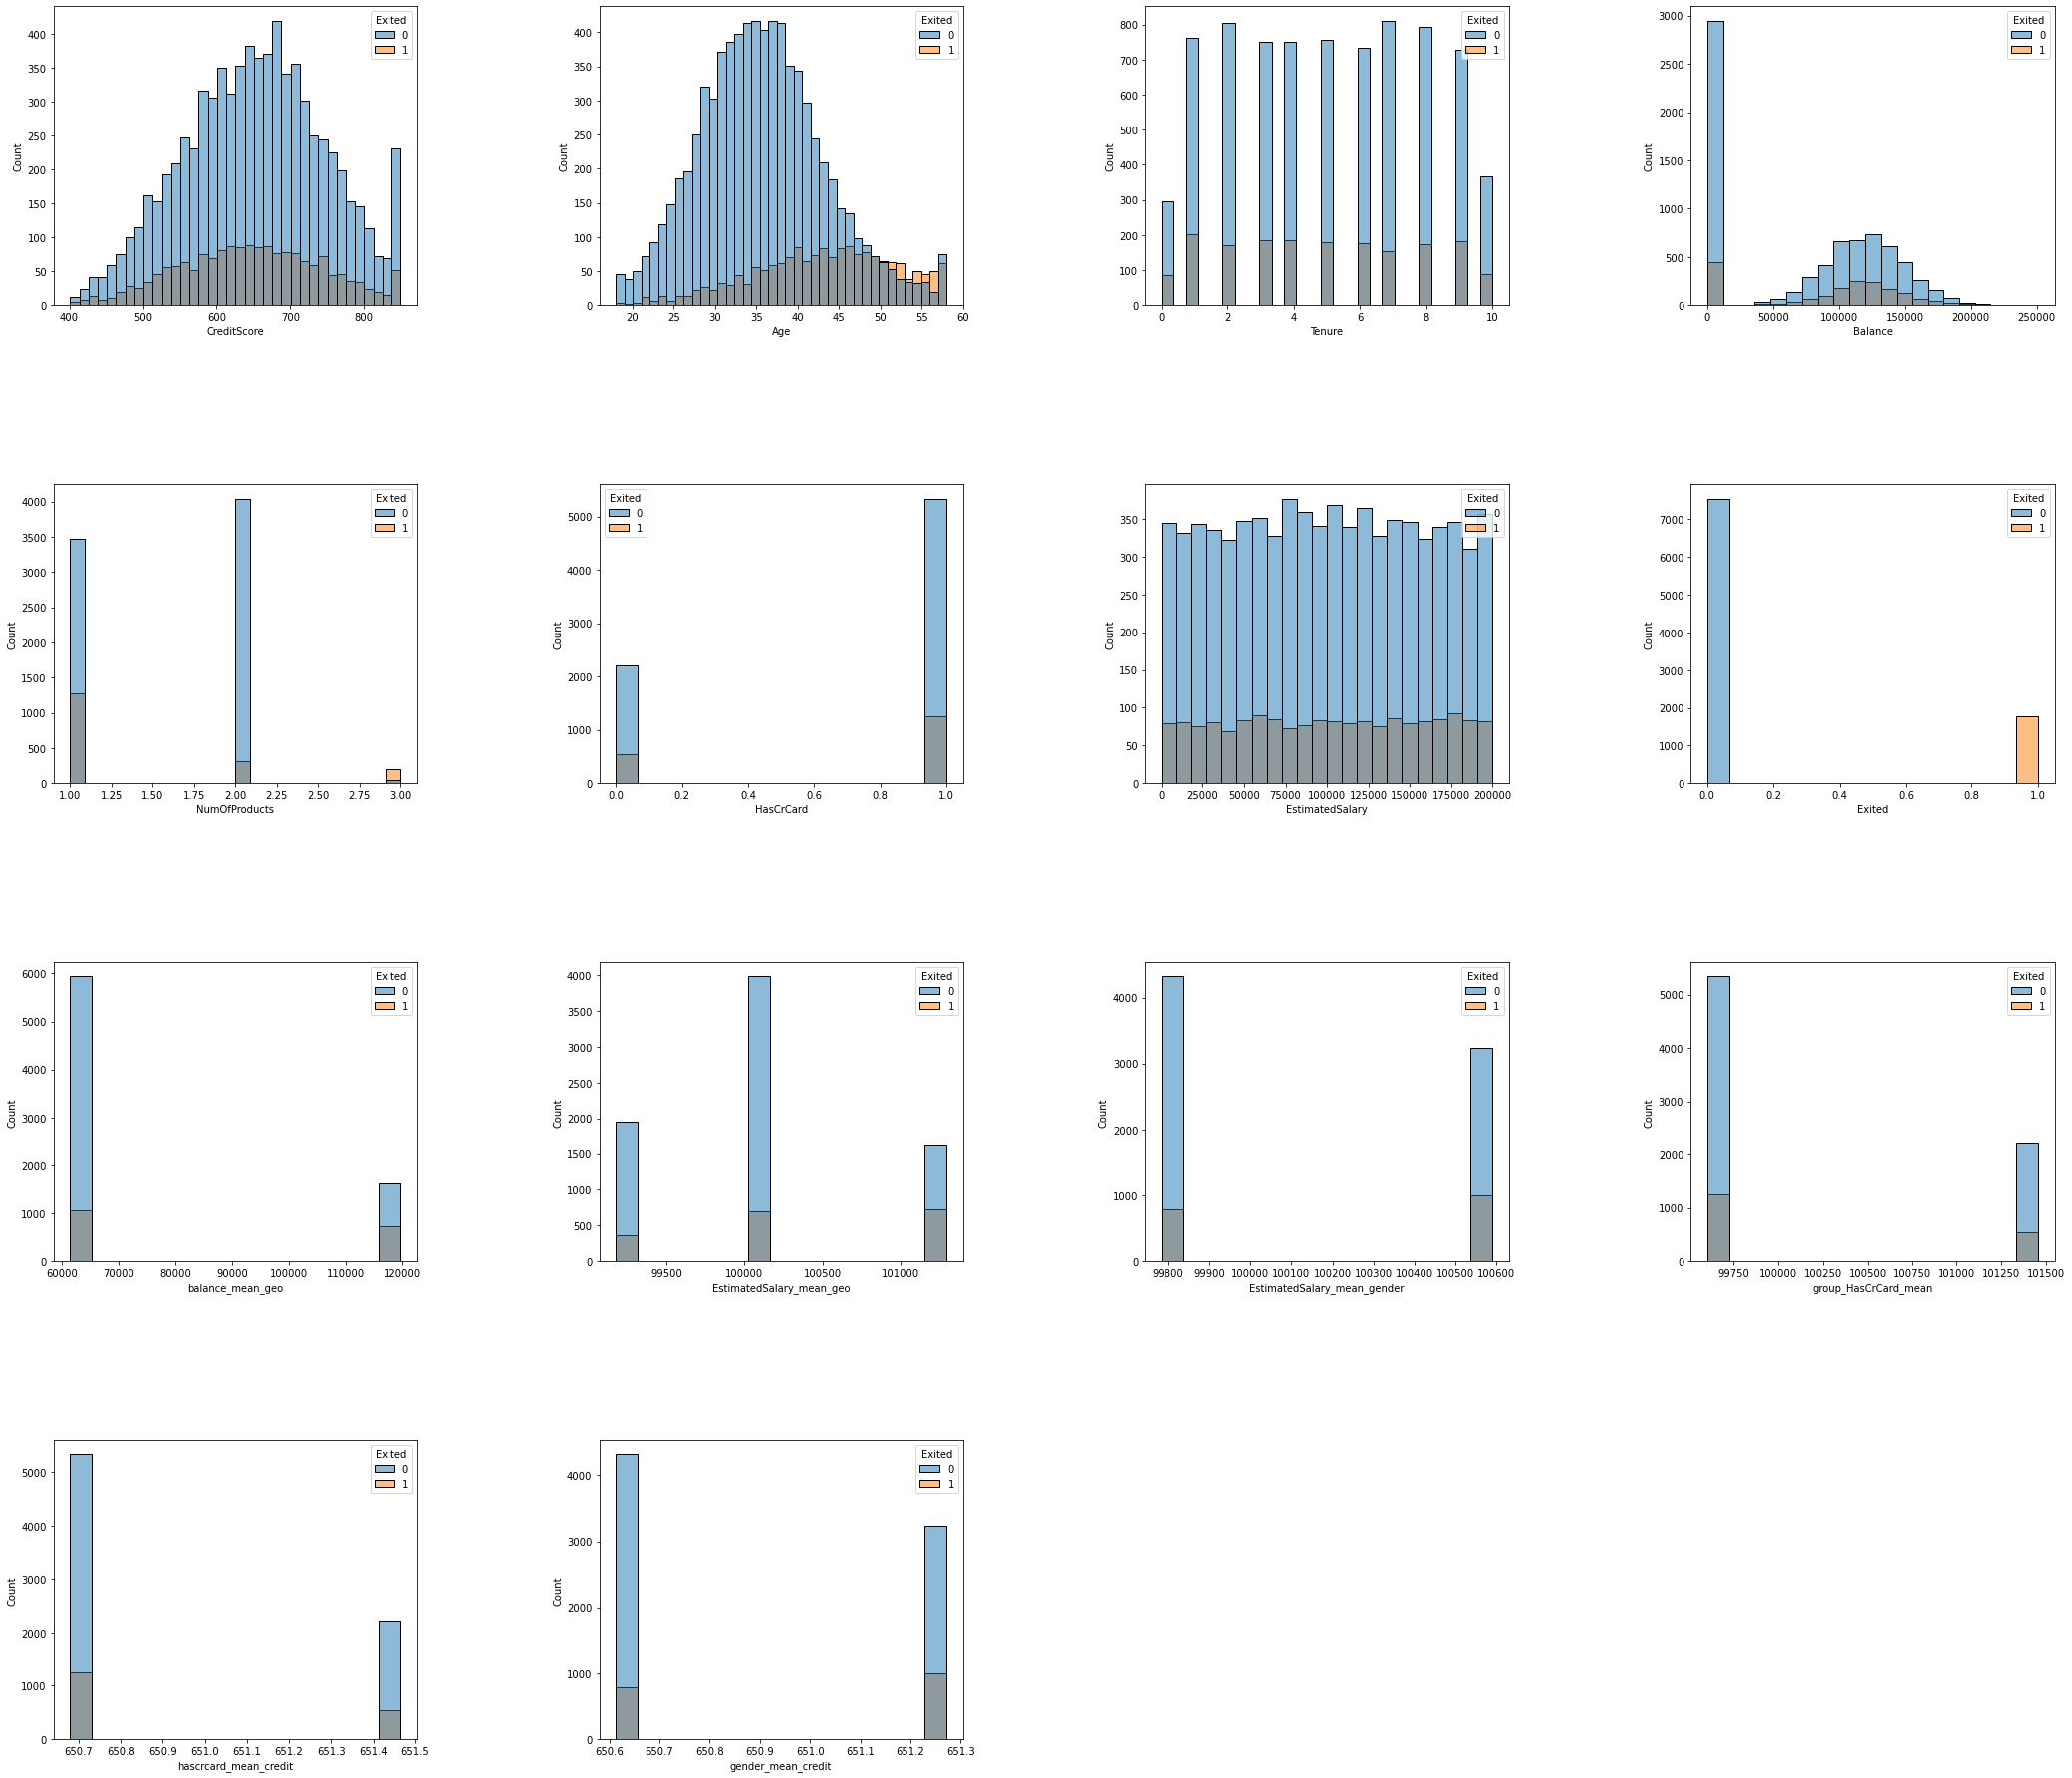

In [21]:
# Antes do feature eng
variables = dataset.select_dtypes(['int64','float64']).columns.to_list()
#variables.remove('RowNumber'), variables.remove('CustomerId')

# Setando a posicão inicial
n = 1

plt.figure(figsize=(36, 32))
for column in dataset[variables].columns[:len(variables)-1]:
    plt.subplot(4, 4, n)
    _ = sns.histplot(data = dataset, x=column, hue='Exited')
    n += 1

plt.subplots_adjust(hspace=0.6,wspace=0.5)
plt.show()

- Confirmamos a tendência de maior churn entre clientes com maior idade.
- Observamos também muitos clientes com 'balance' igual a zero, porém sem uma concetração atipica de casos de churn.
- Distribuições proximas da normal com um skew fraco.

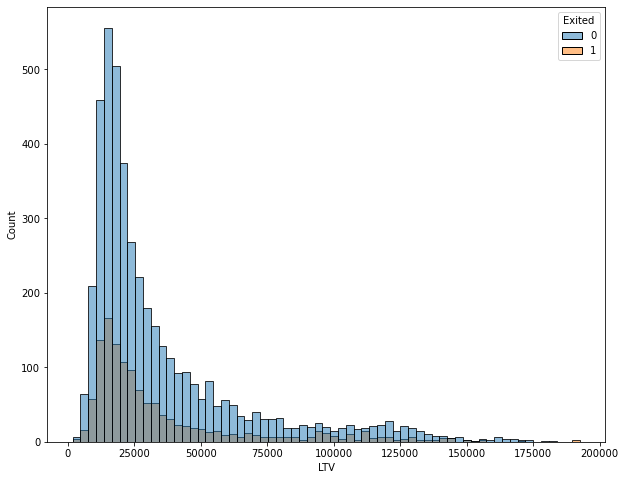

In [22]:
# LTV
LTV = dataset.loc[(dataset['LTV'] != 0) & (dataset['LTV'] < (0.3*1000000)),]

plt.figure(figsize=(10, 8))
sns.histplot(data = LTV, x='LTV', hue='Exited')
plt.show()

- Distribuição com forte skew. Iremos proceder com normalização dos dados na etapa de Feature Eng.

## 5.2 Análise Multivariada

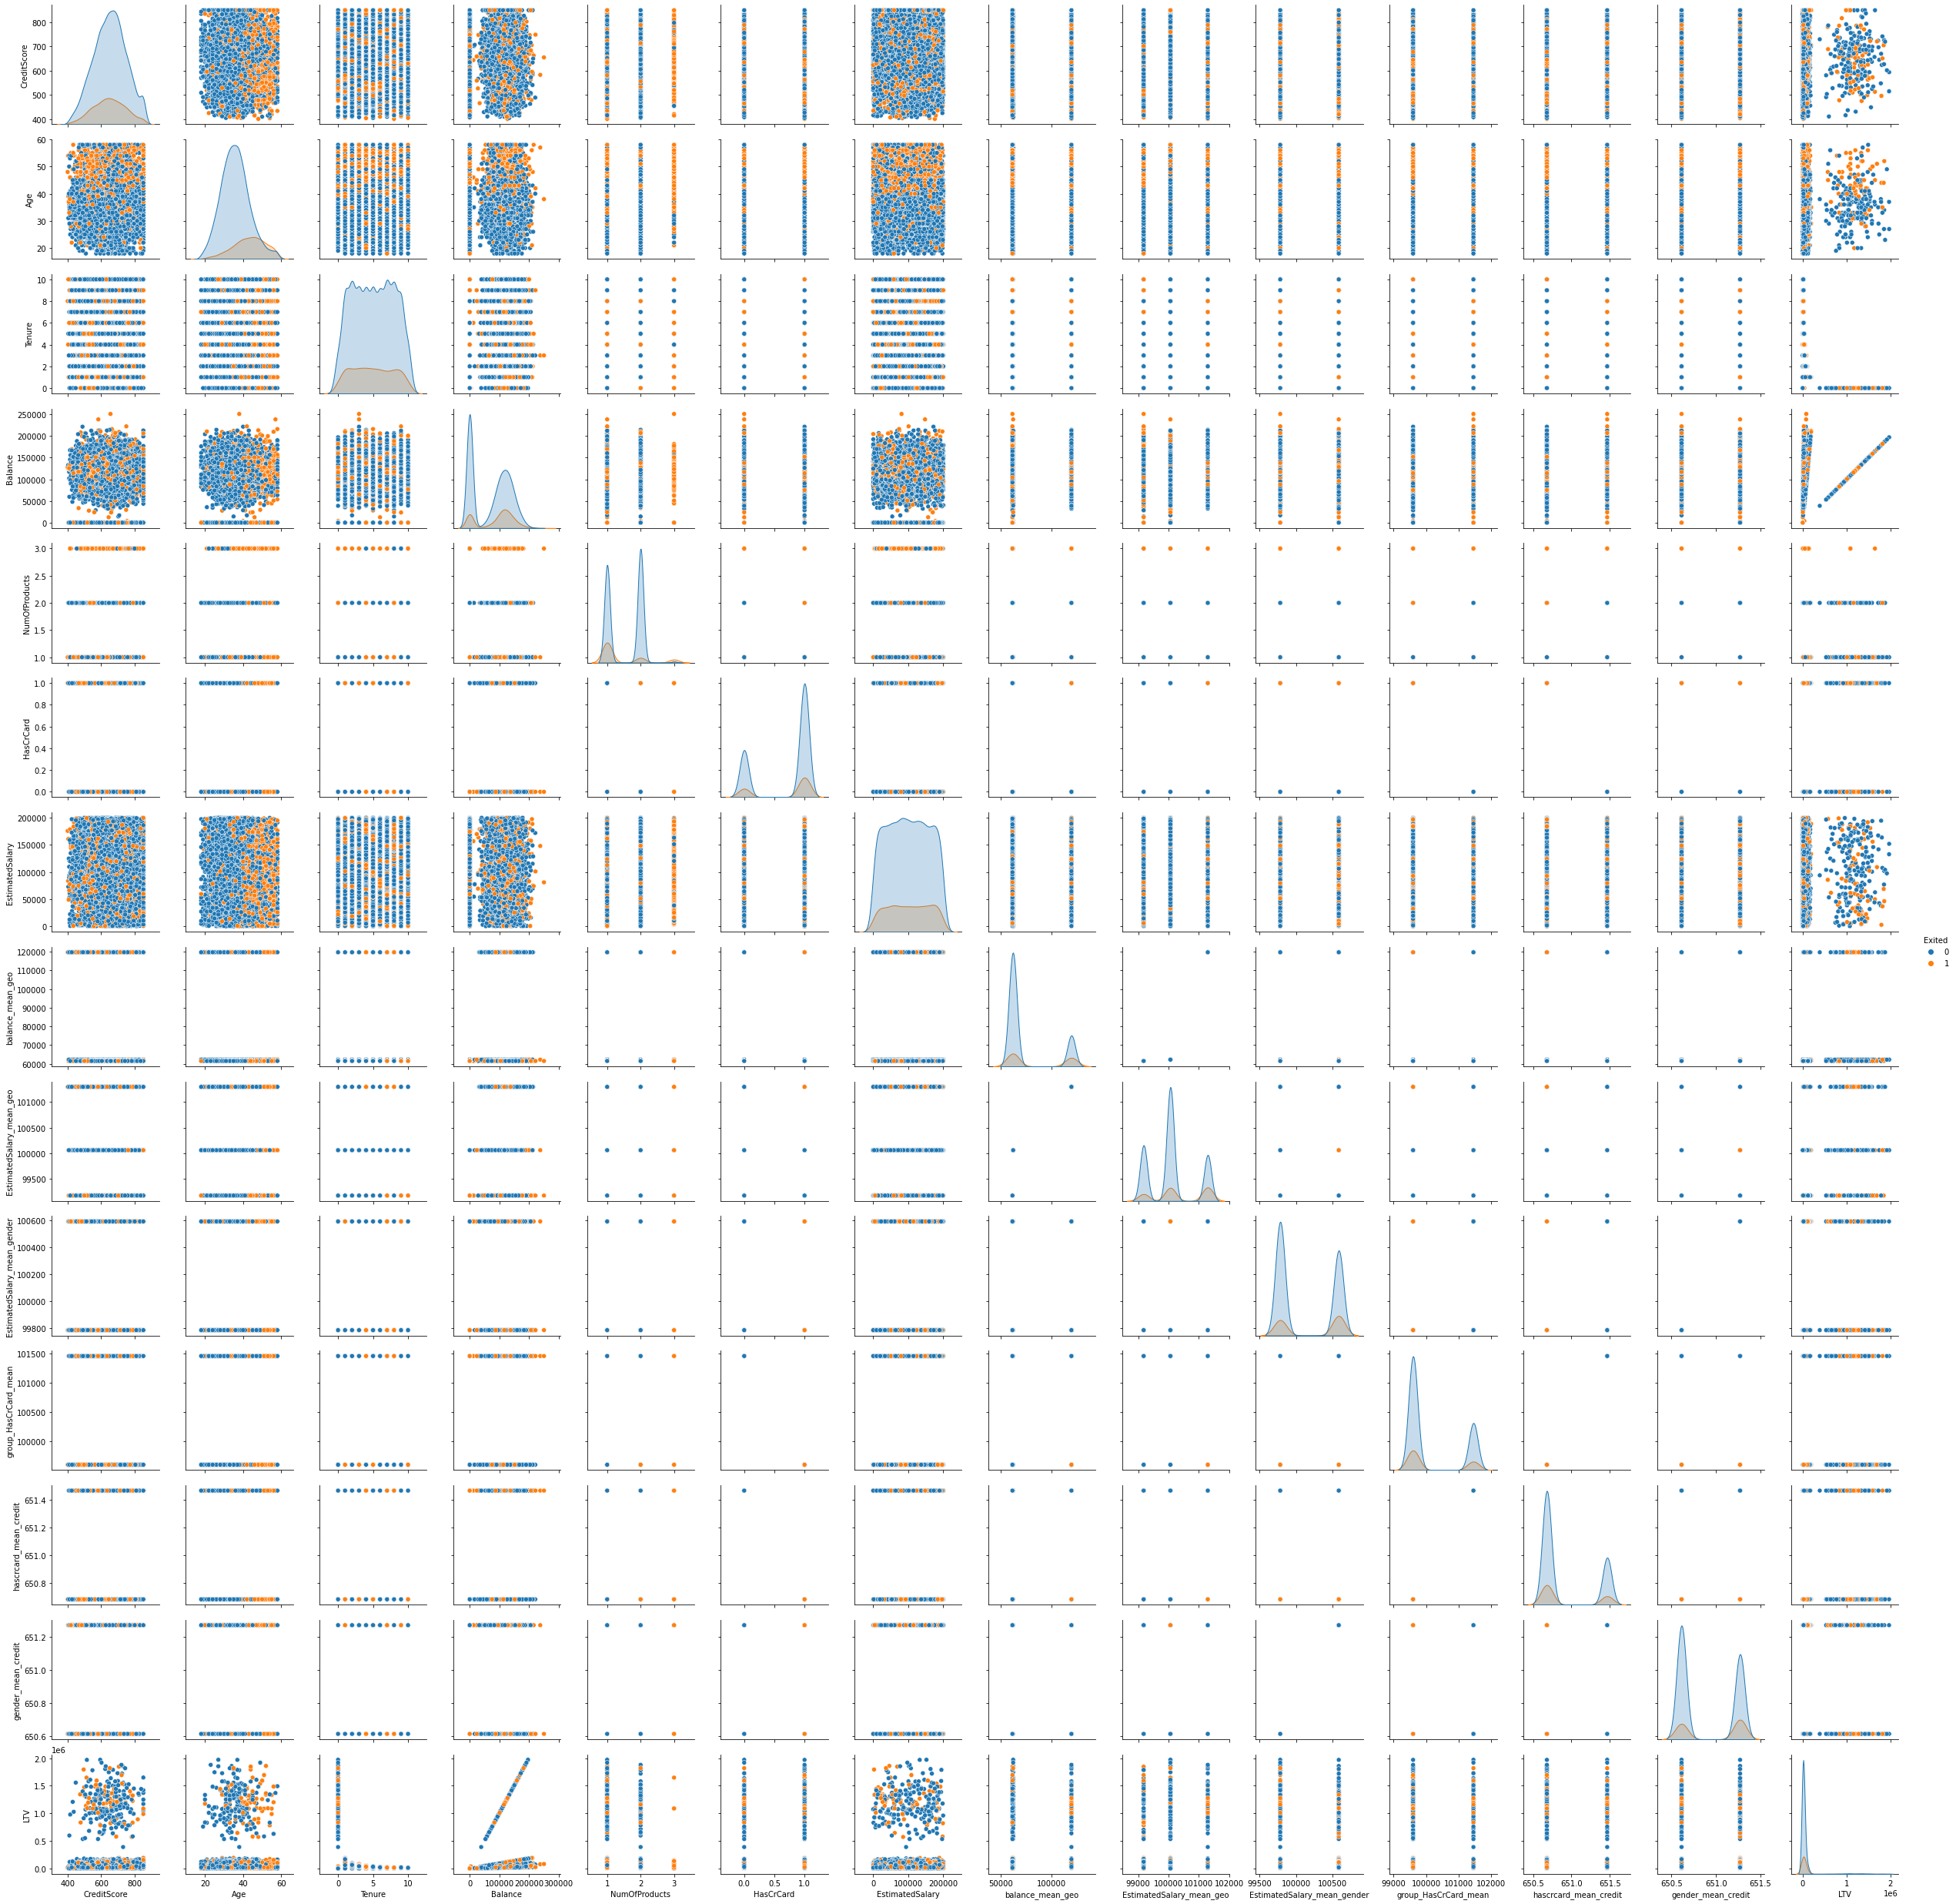

In [23]:
# Variáveis
variables = dataset.select_dtypes(['int64','float64']).columns.to_list()

sns.pairplot(dataset[variables], hue='Exited')

- Não é possível observar nenhuma relação linear entre as variáveis. (com exceção talvez para Balance vs LTV )
- É possivel também notar uma concentração de casos de churn no NumOfProducts igual a 3. 

### Correlations

##### Variáveis Numericas

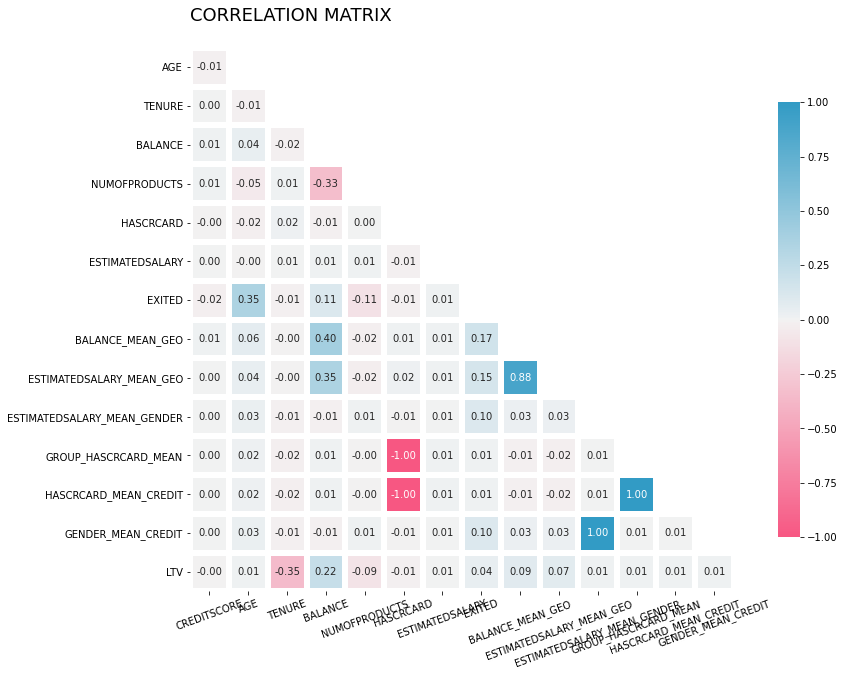

In [32]:
# Pearson correlation Matrix
Myheat_map(dataset =dataset, variaveis=variables)

- Observamos uma grande correlação entre a variável ESTIMATEDSALARY_MEAN_GEO e ESTIMATEDSALARY entre HASCARD_MEAN_CREDIT E ESTIMATEDSALARY_MEAN_GENDER e entre GENDER_MEAN_CREDIT E ESTIMATEDSALARY_MEAN_GEO         iremos excluir uma de cada par.

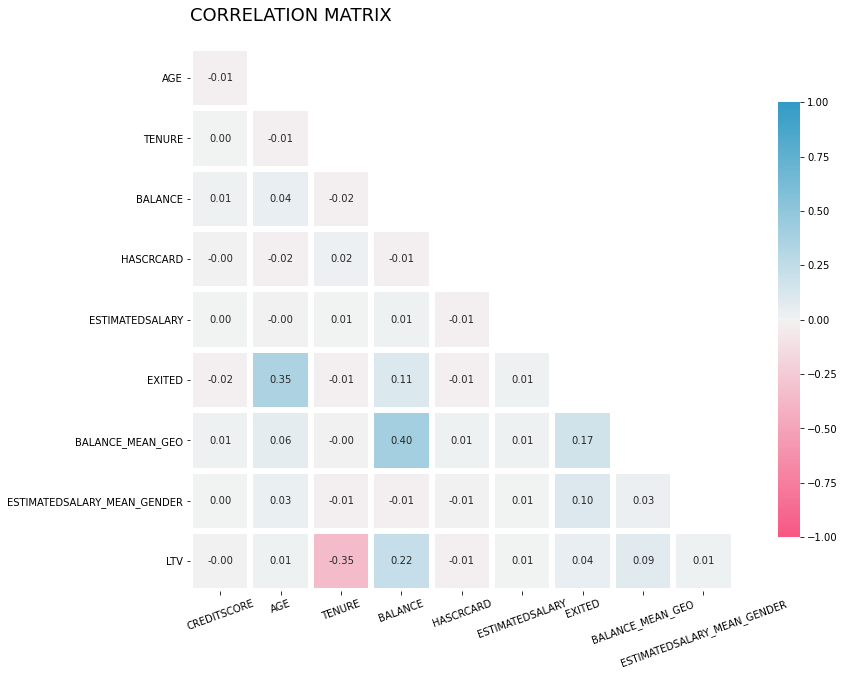

In [33]:
# Removendo a variável mean_x
var_list = ['EstimatedSalary_mean_geo','hascrcard_mean_credit', 'NumOfProducts', 'gender_mean_credit', 'group_HasCrCard_mean']

for var in var_list:
    variables.remove(var)
Myheat_map(dataset =dataset, variaveis=variables)

Text(0.5, 1.0, 'Pointbiserialr')

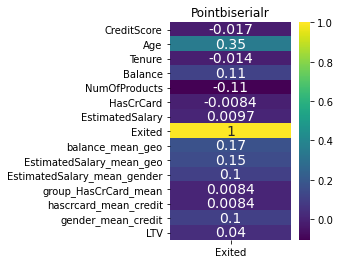

In [34]:
# Numericas com relação a target
variables = dataset.select_dtypes(['int64','float64']).columns.to_list()

# Correlações
corrs = [pointbiserialr(dataset['Exited'], dataset[var])[0] for var in variables]
df_corr = pd.DataFrame({'Exited': corrs}, index=variables)

# Plot Matrix
fig, ax = plt.subplots()
plt.subplot(1, 2, 1)
sns.heatmap(df_corr, annot=True, annot_kws={"fontsize":14}, cmap='viridis')
plt.title("Pointbiserialr")

- Nenhuma variável com a correlação significante  com relação a variávl Target.

### Variáveis categoricas - cramers v

Text(0.5, 1.0, 'Cramér V')

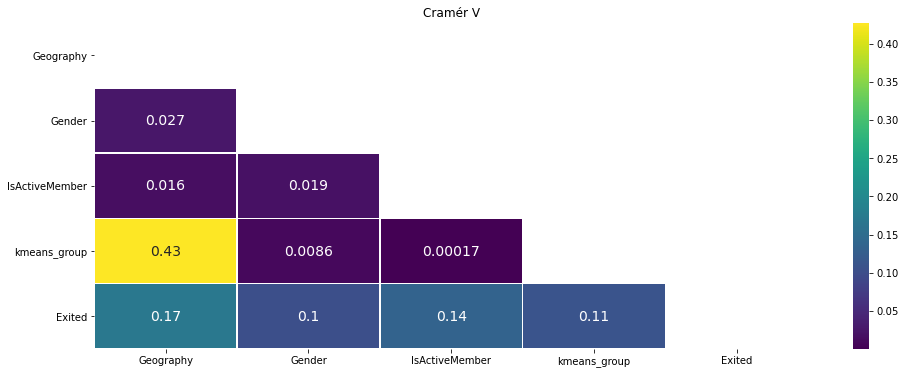

In [37]:
# colunas
cols = dataset.select_dtypes(['category', 'object']).columns.to_list()
cols.append('Exited')

# Dicionário para registro das correlações
dictt = {
        'Geography': [],
        'Gender': [],
        'IsActiveMember': [],
        'kmeans_group': [],
        'Exited': []
        }

for col in cols:
    for col1 in cols:
        corr = cramer_v(dataset[col], dataset[col1])
        dictt[col].append(corr)
        
# Matriz de Correlação
df_cramer1 = pd.DataFrame(dictt)
df_cramer1 = df_cramer1.set_index(df_cramer1.columns)

# HeatMap
fig, ax = plt.subplots()
ax.figure.set_size_inches(16, 6)

mask = np.triu(np.ones_like(df_cramer1, dtype=np.bool))
sns.heatmap(df_cramer1, mask=mask, linewidths=.5, annot=True, annot_kws={"fontsize":14}, cmap='viridis')
plt.title("Cramér V")

- Não encontramos nenhuma variável com alta correlação. Estou considerando correlações acima de 0.6 seriam eliminadas.

# 6.0 Teste de Hipóteses

 - H1 - O 'Balance' é maior acima de 30 anos de idade.
 - H2 - O 'Balance' é maior entre os clientes homens que mulheres.
 - H3 - O 'EstimatedSalary' é maior entre clientes homens que mulheres.
 - H4 - O 'EstimatedSalary' é maior acima de 30 anos de idade.
 - H5 - O churn é maior entre os menbros inativos que os ativos.

## H1 - O 'Balance' é maior acima de 30 anos de idade. [TRUE]

ho - Não a diferença entre o 'Balance' abaixo de 30anos e acima de 30anos.

h1 - Existe diferença entre o 'Balance' abaixo de 30anos e acima de 30anos.

In [29]:
# Dados
dados_h1_over = churn.loc[churn['Age']>30,'Balance']
dados_h1_under = churn.loc[churn['Age']<30,'Balance']

# Testando Hiposteses
print(f'Média over 30anos: {dados_h1_over.mean()}\n')
print(f'Média under 30anos: {dados_h1_under.mean()}\n')
hipo_test(dados_h1_over, dados_h1_under)

Média over 30anos: 77202.33084881339

Média under 30anos: 73629.31794386834

O valor de p é: 0.03629941813233276
Provável haver diferença


(2.0938701582644312, 0.03629941813233276)

Provável haver diferença com os 'Balances' sendo maiores entre os clientes com mais de 30 anos de idade. Hipótese nula pode ser rejeitada.

## H2 - O 'Balance' é maior entre os clientes homens que mulheres. [FALSE]

ho - Não a diferença entre o 'Balance' abaixo de 30anos e acima de 30anos.

h1 - Existe diferença entre o 'Balance' abaixo de 30anos e acima de 30anos.

In [30]:
# Dados
dados_h2_male = churn.loc[churn['Gender']=='Male','Balance']
dados_h2_female = churn.loc[churn['Gender']=='Female','Balance']

# Testando Hipoteses
print(f'Média para Homens: {dados_h2_male.mean()}\n')
print(f'Média para Mulheres: {dados_h2_female.mean()}\n')
hipo_test(dados_h2_male, dados_h2_female)

Média para Homens: 77138.51631239004

Média para Mulheres: 75369.13160756491

O valor de p é: 0.17292430478622076
Provável que não haja diferença


(1.3629716772014098, 0.17292430478622076)

Pareçe não haver diferença entre homens e mulheres. Hipótese nula não pode ser rejeitada.

## H3 - O 'EstimatedSalary' é maior entre clientes homens que mulheres.[FALSE]

ho - Não a diferença entre o 'EstimatedSalary' para Homens e Mulheres

h1 - Existe diferença entre o 'EstimatedSalary' abaixo de 30anos e acima de 30anos.

In [31]:
# Dados
dados_h3_male = churn.loc[churn['Gender']=='Male','EstimatedSalary']
dados_h3_female = churn.loc[churn['Gender']=='Female','EstimatedSalary']

# Testando Hipoteses
print(f'Média para Homens: {dados_h3_male.mean()}\n')
print(f'Média para Mulheres: {dados_h3_female.mean()}\n')
hipo_test(dados_h3_male, dados_h3_female)

Média para Homens: 99783.86932667858

Média para Mulheres: 100589.2012765957

O valor de p é: 0.5003951873191796
Provável que não haja diferença


(-0.6738943170529297, 0.5003951873191796)

Provável que não haja diferença apesar da media (absolutamente) para mulheres ser maior. Hipótese nula não pode ser rejeitada. 

## H4 - O 'EstimatedSalary' é maior acima de 30 anos de idade.[FALSE]

In [32]:
# Dados
dados_h4_over = churn.loc[churn['Age']>30,'EstimatedSalary']
dados_h4_under = churn.loc[churn['Age']<30,'EstimatedSalary']

# Testando Hiposteses
print(f'Média over 30anos: {dados_h4_over.mean()}\n')
print(f'Média under 30anos: {dados_h4_under.mean()}\n')
hipo_test(dados_h4_over, dados_h4_under)

Média over 30anos: 99889.68291389823

Média under 30anos: 100844.11205003057

O valor de p é: 0.5424494801132518
Provável que não haja diferença


(-0.6091362595847778, 0.5424494801132518)

Provável que não haja diferença apesar da media (absolutamente) para clientes abaixo de 30 ser maior. Hipótese nula não pode ser rejeitada. 

## H5 - O churn é maior entre os membros inativos que os ativos.[TRUE]

In [33]:
dados_h5_nchurn = churn.loc[churn['Exited']==0,'IsActiveMember'].astype('int')
dados_h5_churn  = churn.loc[churn['Exited']==1,'IsActiveMember'].astype('int')

# Testando Hiposteses
print(f'Média para a classe 0: {dados_h5_nchurn.sum()}\n')
print(f'Média para a classe 1: {dados_h5_churn.sum()}\n')
hipo_test(dados_h5_nchurn, dados_h5_churn)

Média para a classe 0: 4023

Média para a classe 1: 644

O valor de p é: 1.4783019974120357e-39
Provável haver diferença


(13.22226518330483, 1.4783019974120357e-39)

Provável haver diferença com a classe 0 havendo a maior incidencia do evento churn dessa forma a inatividade do cliente pode levar ao churn. 

# 7.0 Split de Dados

In [20]:
# X e y
X = dataset.drop('Exited', axis=1)
y = dataset['Exited']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.1, shuffle=True, random_state=1)

# Alterando os tipos da Geography e Gender
varr = ['Geography', 'Gender']
for var in varr:
    Xtrain[var] = Xtrain[var].astype('category')
    Xtest[var] = Xtest[var].astype('category')

# Alterando o tipo dos ys
ytrain = ytrain.astype('int64')
ytest = ytest.astype('int64')

# 8.0 Data Preparation

## PowerTransform

In [21]:
# Copy dos dados
Xtrain_power = Xtrain.copy() 
Xtest_power = Xtest.copy()
ytrain_power = ytrain.copy()
ytest_power = ytest.copy()

# Ordinal Encoder
variaveis_category = Xtrain_power.select_dtypes('category')

# Instanciando o Ordinal Encoder
enc = OrdinalEncoder()

for var in variaveis_category:
    Xtrain_power[var] = enc.fit_transform(np.array(Xtrain_power[var]).reshape(-1,1))
    Xtest_power[var] = enc.transform(np.array(Xtest_power[var]).reshape(-1,1))

# Numerical var
variaveis_numerical = Xtrain_power.select_dtypes(['int64','float64'])

# Instanciando o Power Transform
power = PowerTransformer()

for var in variaveis_numerical:
    Xtrain_power[var] = power.fit_transform(np.array(Xtrain_power[var]).reshape(-1,1))
    Xtest_power[var] = power.transform(np.array(Xtest_power[var]).reshape(-1,1))

## RobustScaler

In [22]:
# Copy dos dados
Xtrain_robust = Xtrain.copy() 
Xtest_robust = Xtest.copy()
ytrain_robust = ytrain.copy()
ytest_robust = ytest.copy()

# Ordinal Encoder
variaveis_category = Xtrain_robust.select_dtypes('category')

# Instanciando o Ordinal Encoder
enc = OrdinalEncoder()

for var in variaveis_category:
    Xtrain_robust[var] = enc.fit_transform(np.array(Xtrain_robust[var]).reshape(-1,1))
    Xtest_robust[var] = enc.transform(np.array(Xtest_robust[var]).reshape(-1,1))


# Instanciando o Robust Scaler
scaler = RobustScaler()

for var in variaveis_numerical:
    Xtrain_robust[var] = scaler.fit_transform(np.array(Xtrain_robust[var]).reshape(-1,1))
    Xtest_robust[var] = scaler.transform(np.array(Xtest_robust[var]).reshape(-1,1))

## 8.1 Balanciamento dos dados

In [23]:
# Adicionando balanciamento de dados ao Pipeline

# Instanciando o balanciador
smt = SMOTETomek(sampling_strategy='minority' ,random_state=42)
Xtrain_smt_power, ytrain_smt_power = smt.fit_resample(Xtrain_power, ytrain_power)
Xtrain_smt_robust, ytrain_smt_robust = smt.fit_resample(Xtrain_robust, ytrain_robust)

<AxesSubplot:xlabel='Exited', ylabel='count'>

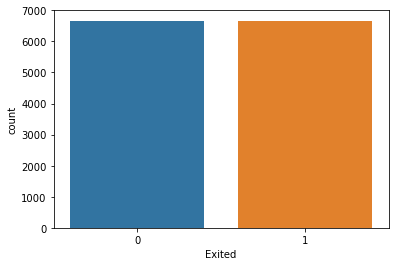

In [24]:
sns.countplot(x='Exited', data=pd.DataFrame(ytrain_smt_power))

# 9.0 Feature Selection

## PowerTransform

In [25]:
# Modelo
model = lgb.LGBMClassifier()

#Selecionador de Features
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True, )

Feature_Selector.fit(X=Xtrain_smt_power,y=ytrain_smt_power, n_trials=10, random_state=1)

100%|██████████| 10/10 [00:12<00:00,  1.20s/it]

8 attributes confirmed important: ['NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Age', 'Tenure', 'Gender', 'Balance', 'Geography']
7 attributes confirmed unimportant: ['gender_mean_credit', 'HasCrCard', 'EstimatedSalary_mean_geo', 'EstimatedSalary_mean_gender', 'balance_mean_geo', 'hascrcard_mean_credit', 'group_HasCrCard_mean']
3 tentative attributes remains: ['LTV', 'CreditScore', 'kmeans_group']


In [26]:
# Visualizando as variáveis selecioandas
X_subset_power = Feature_Selector.Subset()
X_subset_power.head()

,NumOfProducts,IsActiveMember,EstimatedSalary,Age,Tenure,Gender,Balance,Geography
0,-0.972398,1.007044,0.196899,1.994782,-1.029947,0.909054,-1.320053,-0.971344
1,0.950533,-0.993005,0.297563,-1.447950,0.705354,-1.100044,-1.320053,1.306153
2,0.950533,-0.993005,-1.317716,-0.735383,-0.284621,0.909054,0.826939,0.630001
3,-0.972398,1.007044,0.878573,1.896792,0.058592,-1.100044,-1.320053,1.306153
4,0.950533,1.007044,0.845007,-0.211509,-1.448458,0.909054,0.779703,0.630001


## RobustScaler

In [27]:
# Modelo
model = lgb.LGBMClassifier()

#Selecionador de Features
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True, )

Feature_Selector.fit(X=Xtrain_smt_robust,y=ytrain_smt_robust, n_trials=10, random_state=1)

100%|██████████| 10/10 [00:13<00:00,  1.31s/it]

8 attributes confirmed important: ['NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Age', 'Tenure', 'Gender', 'Balance', 'balance_mean_geo']
7 attributes confirmed unimportant: ['gender_mean_credit', 'HasCrCard', 'EstimatedSalary_mean_geo', 'EstimatedSalary_mean_gender', 'kmeans_group', 'hascrcard_mean_credit', 'group_HasCrCard_mean']
3 tentative attributes remains: ['LTV', 'CreditScore', 'Geography']


In [28]:
# Visualizando as variáveis selecioandas
X_subset_robust = Feature_Selector.Subset()
X_subset_robust.head()

,NumOfProducts,IsActiveMember,EstimatedSalary,Age,Tenure,Gender,Balance,balance_mean_geo
0,0.0,1.0,0.061830,1.636364,-0.6,0.0,-0.759035,0.000000
1,1.0,0.0,0.126286,-1.000000,0.4,-1.0,-0.759035,-1.000000
2,1.0,0.0,-0.756808,-0.545455,-0.2,0.0,0.352616,80.840557
3,0.0,1.0,0.518091,1.545455,0.0,-1.0,-0.759035,-1.000000
4,1.0,1.0,0.494581,-0.181818,-0.8,0.0,0.220711,80.840557


# 10.0 Model Selection

Comparando as a performance dos modelos, utilizando todas as variáveis contra utilizando somente as variáveis selecionadas pelo BorutaShap. Podemos observar que a melhor performance foi obtida pelo QDA com 
0.96 de recall quando apalicado power transformation.

Iremos seguir com o QDA e SVM (que teve um performance mais equilibrada entre recall e acuracia geral), iremos comparar esse dois modelos e escolheremos um para deploy.  

A métrica base utilizada será o recall. A principal razão é por estarmos trabalhando com um problema de binário cujo o evento alvo é raro, dessa forma, queremos ter alta capacidade de detecção do evento alvo (recall). Como estamos modelando o churn de clientes erarmos a classe negativa ou classe 0 não é um problema, sendo que realizar ações para esses clientes podem acabar aumentando os seus tickets e a satisfação dos mesmos com a empresa. Porém é imperativo que entremos em contato com todos os possiveis 'clientes churns' pois dessa forma iremos maximizar a nossa retenção.

## Com todas as variáveis

In [29]:
# Excluindo variáveis com alta correlação
# Xtrain_smt_new = Xtrain_smt.drop(['EstimatedSalary_mean_geo','hascrcard_mean_credit', 'gender_mean_credit'], axis=1)

# Selicionando o modelo a ser trabalhado. 
# Power
power_metrics = model_selection(Xtrain_smt_power, ytrain_smt_power, Xtest=Xtest_power, ytest=ytest_power)
power_metrics.rename(index={0: "power_metrics"}, inplace=True)

# Robust
robust_metrics = model_selection(Xtrain_smt_robust, ytrain_smt_robust, Xtest=Xtest_robust, ytest=ytest_robust)
robust_metrics.rename(index={0: "robust_metrics"}, inplace=True)

# Concat
painel = pd.concat([power_metrics, robust_metrics], axis=0)
painel

,LR,SVM,LDA,QDA,DecisionTree,RandomForestClassifier,LGBM,XGBOOST
power_metrics,0.680233,0.720930,0.686047,0.965116,0.456131,0.547040,0.505814,0.488372
robust_metrics,0.686047,0.709302,0.691860,0.000000,0.491015,0.549154,0.517442,0.500000


## Com as variáveis selecionadas pelo Boruta.

In [31]:
# Selecionando o modelo a ser trabalhado

# Power_Data
power_var = ['NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Age', 'Tenure', 'Gender', 'Balance', 'Geography']
#Xtrain_power_new = Xtrain_smt_power[power_var]
Xtest_power_new = Xtest_power[power_var]

# Robust_Data ['IsActiveMember', 'Age', 'NumOfProducts', 'Gender', 'Balance_robust', 'Geography']
robust_var = ['NumOfProducts', 'IsActiveMember', 'EstimatedSalary', 'Age', 'Tenure', 'Gender', 'Balance', 'balance_mean_geo']
#Xtrain_robust_new = Xtrain_smt_robust[robust_var]
Xtest_robust_new = Xtest_robust[robust_var]

# Power
power_metrics = model_selection(X_subset_power, ytrain_smt_power, Xtest=Xtest_power_new, ytest=ytest_power)
power_metrics.rename(index={0: "power_metrics"}, inplace=True)

# Robust
robust_metrics = model_selection(X_subset_robust, ytrain_smt_robust, Xtest=Xtest_robust_new, ytest=ytest_robust)
robust_metrics.rename(index={0: "robust_metrics"}, inplace=True)

# Concat
painel = pd.concat([power_metrics, robust_metrics], axis=0)
painel

,LR,SVM,LDA,QDA,DecisionTree,RandomForestClassifier,LGBM,XGBOOST
power_metrics,0.686047,0.744186,0.680233,0.720930,0.535941,0.557611,0.517442,0.488372
robust_metrics,0.680233,0.715116,0.680233,0.703488,0.470402,0.554440,0.517442,0.500000


# 11.0 Tunning/Treinamento do modelo

** Quadratic Discriminant Analysis: **

O que é QDA?



## Treinando QDA!

,QDA Metrics
ACC,0.476445
KAPPA,0.152387
RECALL,0.941860
F1,0.398524
PRECISION,0.252730


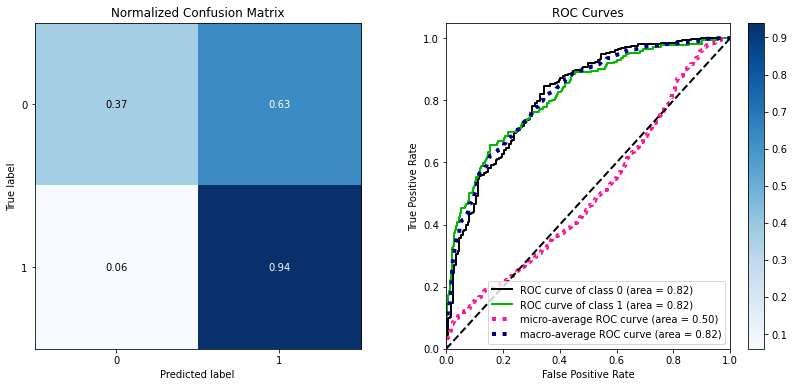

In [33]:
# Dados transformados pelo powerTransform e selecionados pelo Boruta

def train_QDA(Xtrain, ytrain, Xtest, ytest, priors, reg_param):

    model = QuadraticDiscriminantAnalysis(priors=priors,
                                          reg_param=reg_param,
                                          store_covariance=False)

    # Dicionário de metricas
    resultados = {'ACC': [],
                  'KAPPA': [],
                  'RECALL': [],
                  'F1': [],
                  'PRECISION': []}

    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    proba = model.predict_proba(Xtest)
    Acc = accuracy_score(ytest, pred)
    Kappa =  cohen_kappa_score(ytest, pred)
    Recall = recall_score(ytest, pred)
    F1 = f1_score(ytest,pred)
    Precision = precision_score(ytest, pred)

    resultados['ACC'].append(Acc)
    resultados['KAPPA'].append(Kappa)
    resultados['RECALL'].append(Recall)
    resultados['F1'].append(F1)
    resultados['PRECISION'].append(Precision)
    
    # Salvando o modelo em pickle
    with open('models/modelo_QDA.pkl', 'wb') as f:
        pickle.dump(model, f)

    # Painel
    painel_df = pd.DataFrame(resultados).T
    painel_df.rename(columns={0:"QDA Metrics"}, inplace=True)
    
    
    # Confusion Matrix e ROC Curve
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
    plot_confusion_matrix(ytest, pred, normalize=True, ax=ax1)
    plot_roc(ytest, proba, ax=ax2)
    return painel_df, model

# Treinando modelo tunnado
painel, qda_model = train_QDA( Xtrain=X_subset_power, 
                               ytrain=ytrain_smt_power,
                               Xtest=Xtest_power_new,
                               ytest=ytest_power,
                               priors=(0.20,0.80),
                               reg_param=0.0)

# painel de metricas
painel

Conforme acima alcançamos um recall de 0.94, ou seja iremos identificar os clientes propensos a churn em com 94% de acuracia ao custo de acertarmos somente em 37% aqueles clientes que não são propensos a churn. Um alto recall vem com o custo de classificarmos alguns classes 0 como 1.

### Treinando com dados desbalanceados!

,QDA Metrics
ACC,0.239829
KAPPA,-0.003286
RECALL,0.901163
F1,0.303922
PRECISION,0.182783


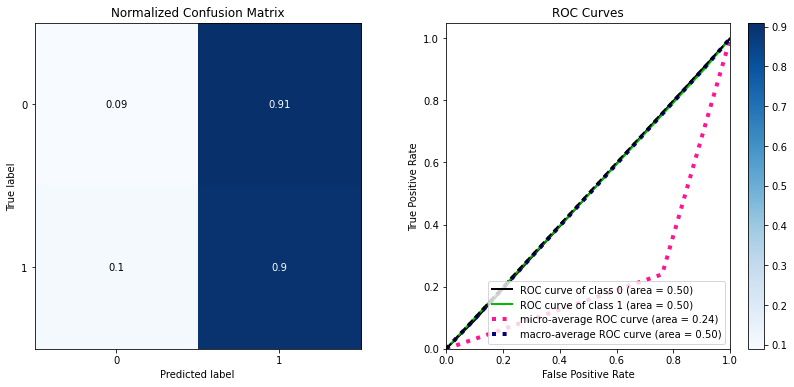

In [35]:
# Dados transformados pelo powerTransform e selecionados pelo Boruta

def train_QDA(Xtrain, ytrain, Xtest, ytest, priors, reg_param):

    model = QuadraticDiscriminantAnalysis(priors=priors,
                                          reg_param=reg_param,
                                          store_covariance=False)

    # Dicionário de metricas
    resultados = {'ACC': [],
                  'KAPPA': [],
                  'RECALL': [],
                  'F1': [],
                  'PRECISION': []}

    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    proba = model.predict_proba(Xtest)
    Acc = accuracy_score(ytest, pred)
    Kappa =  cohen_kappa_score(ytest, pred)
    Recall = recall_score(ytest, pred)
    F1 = f1_score(ytest,pred)
    Precision = precision_score(ytest, pred)

    resultados['ACC'].append(Acc)
    resultados['KAPPA'].append(Kappa)
    resultados['RECALL'].append(Recall)
    resultados['F1'].append(F1)
    resultados['PRECISION'].append(Precision)
    
    # Salvando o modelo em pickle
    with open('models/modelo_QDA.pkl', 'wb') as f:
        pickle.dump(model, f)

    # Painel
    painel_df = pd.DataFrame(resultados).T
    painel_df.rename(columns={0:"QDA Metrics"}, inplace=True)
    
    
    # Confusion Matrix e ROC Curve
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
    plot_confusion_matrix(ytest, pred, normalize=True, ax=ax1)
    plot_roc(ytest, proba, ax=ax2)
    return painel_df, model

# Treinando modelo tunnado
painel, qda_model = train_QDA( Xtrain=Xtrain_power, 
                               ytrain=ytrain_power,
                               Xtest=Xtest_power,
                               ytest=ytest_power,
                               priors=(0.20,0.80),
                               reg_param=0.0)

# painel de metricas
painel

## Treinando com SVM!

,SVM Metrics
ACC,0.790150
KAPPA,0.440219
RECALL,0.750000
F1,0.568282
PRECISION,0.457447


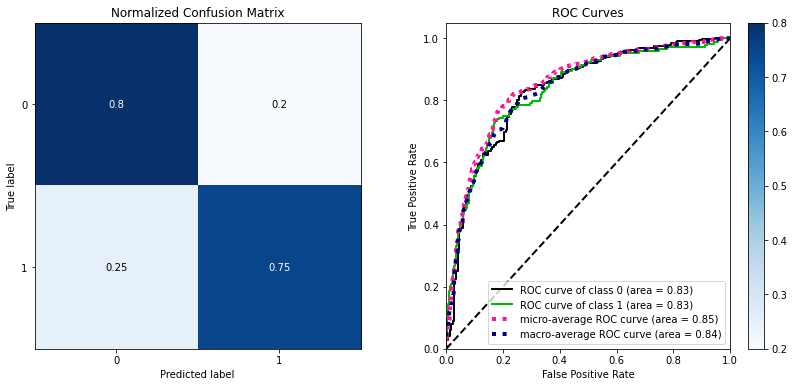

In [56]:
# Dados transformados pelo powerTransform e selecionados pelo Boruta

def train_SVM(Xtrain, ytrain, Xtest, ytest, C, kernel, degree, class_weight="balanced", probability=True):

    model = SVC(C=C,
                kernel=kernel,
                degree=degree,
                class_weight=class_weight,
                probability=probability)

    # Dicionário de metricas
    resultados = {'ACC': [],
                  'KAPPA': [],
                  'RECALL': [],
                  'F1': [],
                  'PRECISION': []}

    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    proba = model.predict_proba(Xtest)
    Acc = accuracy_score(ytest, pred)
    Kappa =  cohen_kappa_score(ytest, pred)
    Recall = recall_score(ytest, pred)
    F1 = f1_score(ytest,pred)
    Precision = precision_score(ytest, pred)

    resultados['ACC'].append(Acc)
    resultados['KAPPA'].append(Kappa)
    resultados['RECALL'].append(Recall)
    resultados['F1'].append(F1)
    resultados['PRECISION'].append(Precision)
    
    # Salvando o modelo em pickle
    with open('models/modelo_SVM.pkl', 'wb') as f:
        pickle.dump(model, f)

    # Painel
    painel_df = pd.DataFrame(resultados).T
    painel_df.rename(columns={0:"SVM Metrics"}, inplace=True)
    
    # Confusion Matrix e ROC Curve
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
    plot_confusion_matrix(ytest, pred, normalize=True, ax=ax1)
    plot_roc(ytest, proba, ax=ax2)
    
    return painel_df, model

# Treinando modelo tunnado
painel, svm_model = train_SVM( Xtrain=X_subset_power, 
                               ytrain=ytrain_smt_power,
                               Xtest=Xtest_power_new,
                               ytest=ytest_power,
                               C=1.5,
                               kernel='poly',
                               degree=5)

# painel de metricas
painel

---------------------------Analise--------------------------

### Treinando com dados desbalanceados!

,SVM Metrics
ACC,0.778373
KAPPA,0.399045
RECALL,0.691860
F1,0.534831
PRECISION,0.435897


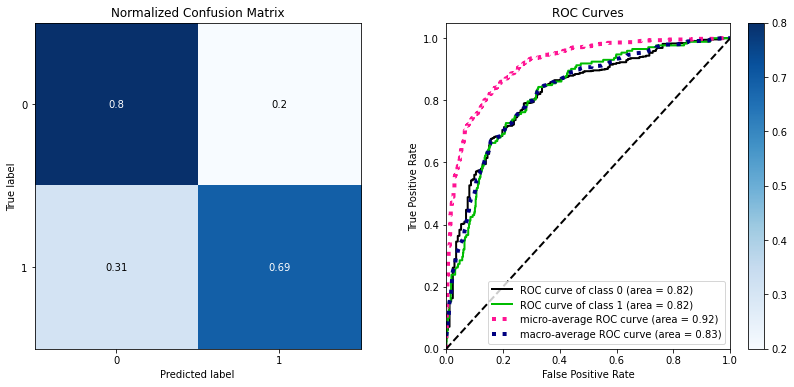

In [57]:
# Dados desbalanciados passarão somente pelo Feature Eng e Data prep 

def train_SVM(Xtrain, ytrain, Xtest, ytest, C, kernel, degree, class_weight="balanced", probability=True):

    model = SVC(C=C,
                kernel=kernel,
                degree=degree,
                class_weight=class_weight,
                probability=probability)

    # Dicionário de metricas
    resultados = {'ACC': [],
                  'KAPPA': [],
                  'RECALL': [],
                  'F1': [],
                  'PRECISION': []}

    model.fit(Xtrain, ytrain)
    pred = model.predict(Xtest)
    proba = model.predict_proba(Xtest)
    Acc = accuracy_score(ytest, pred)
    Kappa =  cohen_kappa_score(ytest, pred)
    Recall = recall_score(ytest, pred)
    F1 = f1_score(ytest,pred)
    Precision = precision_score(ytest, pred)

    resultados['ACC'].append(Acc)
    resultados['KAPPA'].append(Kappa)
    resultados['RECALL'].append(Recall)
    resultados['F1'].append(F1)
    resultados['PRECISION'].append(Precision)

    # Painel
    painel_df = pd.DataFrame(resultados).T
    painel_df.rename(columns={0:"SVM Metrics"}, inplace=True)
    
    # Confusion Matrix e ROC Curve
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
    plot_confusion_matrix(ytest, pred, normalize=True, ax=ax1)
    plot_roc(ytest, proba, ax=ax2)
    
    return painel_df, model

# Treinando modelo tunnado
painel, svm_model = train_SVM( Xtrain=Xtrain_power, 
                               ytrain=ytrain_power,
                               Xtest=Xtest_power,
                               ytest=ytest_power,
                               C=1.5,
                               kernel='poly',
                               degree=5)

# painel de metricas
painel

# 12.0 API

In [66]:
# Example Data
test_data = churn.sample(10)

# Tunnig into a json
df_json = test_data.to_json(orient='records')
df_json

'[{"RowNumber":435,"CustomerId":15799384,"Surname":"Collier","CreditScore":683,"Geography":"France","Gender":"Male","Age":33,"Tenure":8,"Balance":0.0,"NumOfProducts":1,"HasCrCard":0,"IsActiveMember":0,"EstimatedSalary":73564.44,"Exited":0},{"RowNumber":2685,"CustomerId":15631927,"Surname":"Thomas","CreditScore":574,"Geography":"Spain","Gender":"Female","Age":28,"Tenure":7,"Balance":0.0,"NumOfProducts":2,"HasCrCard":0,"IsActiveMember":0,"EstimatedSalary":185660.3,"Exited":0},{"RowNumber":8899,"CustomerId":15760427,"Surname":"Cameron","CreditScore":850,"Geography":"France","Gender":"Male","Age":40,"Tenure":6,"Balance":124788.18,"NumOfProducts":1,"HasCrCard":1,"IsActiveMember":0,"EstimatedSalary":65612.12,"Exited":0},{"RowNumber":4785,"CustomerId":15811588,"Surname":"Eluemuno","CreditScore":664,"Geography":"Spain","Gender":"Female","Age":53,"Tenure":7,"Balance":187602.18,"NumOfProducts":1,"HasCrCard":1,"IsActiveMember":0,"EstimatedSalary":186392.99,"Exited":1},{"RowNumber":6641,"CustomerI

## API_Predictions

In [67]:
url = 'http://0.0.0.0:5000/predict'
#url = 'https://pa001-app.herokuapp.com/predict'
data = df_json
header = {'Content-type': 'application/json'}

# Request
r = requests.post(url=url, data=data, headers=header)
print(r.status_code)
r.json()

200


[{'EstimatedSalary': -0.7511250184,
  'Geography': -0.6534363247,
  'Age': -0.7168965379,
  'NumOfProducts': -0.9736637393,
  'Tenure': 1.3468599726,
  'Gender': -0.8164965809,
  'IsActiveMember': -0.8164965809,
  'Balance': -0.9996628109,
  'prediction': 0},
 {'EstimatedSalary': 0.6332746684,
  'Geography': -0.6534363247,
  'Age': 1.1899659525,
  'NumOfProducts': 0.8124512667,
  'Tenure': -0.3923565151,
  'Gender': -0.8164965809,
  'IsActiveMember': -0.8164965809,
  'Balance': -0.9996628109,
  'prediction': 0},
 {'EstimatedSalary': -0.9453820974,
  'Geography': -0.6534363247,
  'Age': 0.3947547573,
  'NumOfProducts': -0.9736637393,
  'Tenure': 0.2046691818,
  'Gender': -0.8164965809,
  'IsActiveMember': -0.8164965809,
  'Balance': 0.9927106741,
  'prediction': 0},
 {'EstimatedSalary': 1.2215133748,
  'Geography': -0.6534363247,
  'Age': -0.1904397461,
  'NumOfProducts': -0.9736637393,
  'Tenure': -0.3923565151,
  'Gender': -0.8164965809,
  'IsActiveMember': 1.2247448714,
  'Balance': 